# Essais de segmentation

In [1]:
import pandas as pd
from MLUtils import DataAnalysis, DataEngineering

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importation du jeu de données
df = pd.read_csv('data/clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94269 entries, 0 to 94268
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         94269 non-null  object 
 1   total_orders               94269 non-null  int64  
 2   avg_delivery_time_days     94269 non-null  float64
 3   days_since_last_order      94269 non-null  float64
 4   total_spent                94269 non-null  float64
 5   avg_review_score           94269 non-null  float64
 6   max_delivery_delay_days    94269 non-null  float64
 7   has_comment                94269 non-null  int64  
 8   last_payment_type          94269 non-null  object 
 9   last_payment_installments  94269 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 7.2+ MB


## Normalisation des données

In [4]:
# Normalisation de la colonne 'total_orders'
from sklearn.preprocessing import StandardScaler

# Initialisation du StandardScaler
scaler = StandardScaler()

# Fit et transformation de la colonne 'total_orders'
df['total_orders_normalized'] = scaler.fit_transform(df[['total_orders']])





In [5]:
df.sample(10)

,customer_unique_id,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments,total_orders_normalized
37954,66c83c31b3b31eea8db3ba23bc903f6c,1,9.468924,162.450428,157.45,4.0,0.0,0,credit_card,1.0,-0.117306
89184,f20d03ab638209de28eec4076c1958ae,1,12.756319,207.882419,37.79,5.0,0.0,0,other,1.0,-0.117306
20823,38607c951da86c197d3d4f6d69c4ea3c,1,8.247141,464.132106,46.01,5.0,0.0,1,credit_card,1.0,-0.117306
88809,f1044bdd9554c562e992ac6037a095c8,1,12.407269,97.320069,209.51,5.0,0.0,1,credit_card,2.0,-0.117306
60623,a47e60ea2d887b551dd43be061f1bb07,1,7.934236,326.252095,179.24,5.0,0.0,0,credit_card,4.0,-0.117306
3107,08554ba98b22fef639d30edbb94dceb3,1,7.236609,406.163900,30.02,4.0,0.0,0,credit_card,3.0,-0.117306
19501,34c84b94c38a2eddd9563ba41db3439d,1,4.954340,441.119201,64.10,1.0,0.0,1,other,1.0,-0.117306
33771,5b6d9e07623d590dc2bca9d345e04072,1,3.104132,85.986944,341.49,4.0,0.0,1,credit_card,8.0,-0.117306
58864,9fab43415e920fd016c00856d8321a30,1,17.400266,256.255556,56.69,5.0,0.0,0,credit_card,5.0,-0.117306
71578,c21046e84e00a13cf813c70ebf1acf25,1,8.106944,57.098368,104.85,5.0,0.0,0,other,1.0,-0.117306


In [6]:
df.describe()

,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_installments,total_orders_normalized
count,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,9.426900e+04
mean,1.016739,12.519144,287.770761,162.969419,4.155474,0.765609,0.408119,2.928248,-4.263151e-16
std,0.142699,9.462724,152.802708,223.318382,1.282087,4.695404,0.491488,2.708299,1.000005e+00
min,1.000000,0.533414,49.145613,9.590000,1.000000,0.000000,0.000000,0.000000,-1.173056e-01
25%,1.000000,6.765856,163.737350,62.540000,4.000000,0.000000,0.000000,1.000000,-1.173056e-01
50%,1.000000,10.210301,268.780012,106.720000,5.000000,0.000000,0.000000,2.000000,-1.173056e-01
75%,1.000000,15.671852,397.218368,179.340000,5.000000,0.000000,1.000000,4.000000,-1.173056e-01
max,11.000000,208.351759,744.364907,13664.080000,5.000000,188.975081,1.000000,24.000000,6.996054e+01


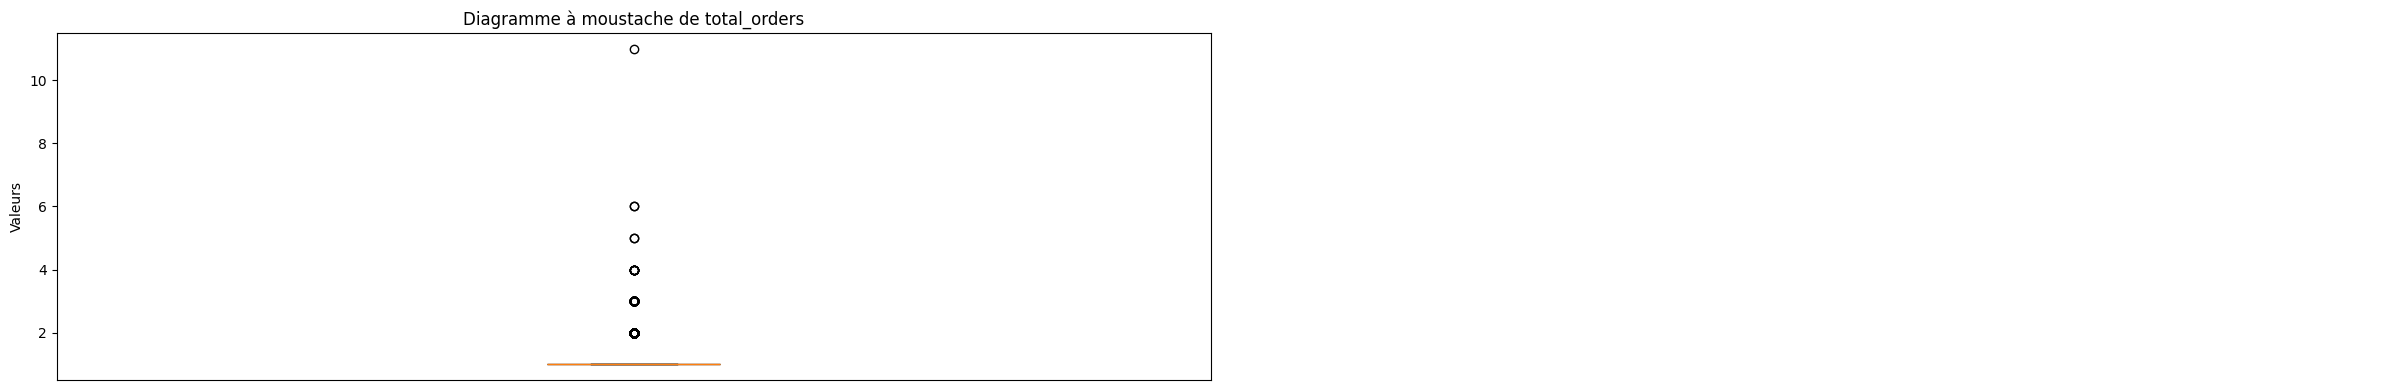

In [7]:
import matplotlib.pyplot as plt
import math

# Données pour le graphique
columns_to_plot = ['total_orders']
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(len(columns_to_plot) / 2)

# Ajuster la taille de la figure
fig, axs = plt.subplots(num_rows, 2, figsize=(12*2, 4*num_rows))
axs = axs.ravel()

for idx, col in enumerate(columns_to_plot):
    axs[idx].boxplot(data_to_plot[idx], vert=True, patch_artist=True)
    axs[idx].set_title(f'Diagramme à moustache de {col}')
    axs[idx].set_ylabel('Valeurs')
    axs[idx].set_xticks([])

# Supprimer les axes non utilisés s'il y en a
for idx in range(len(columns_to_plot), num_rows*2):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

## Cette normalization sera utile pour aider les modèles de clustering à travailler convenablement.

Nous l'appliquons donc aux autres colonnes numériques :

 2   avg_delivery_time_days  92753 non-null  float64
 3   days_since_last_order   92753 non-null  float64
 4   total_spent             92753 non-null  float64
 5   avg_review_score        92753 non-null  float64

In [8]:
# Fit et transformation de la colonne 'avg_delivery_time_days'
df['avg_delivery_time_days_normalized'] = scaler.fit_transform(df[['avg_delivery_time_days']])

# Fit et transformation de la colonne 'days_since_last_order'
df['days_since_last_order_normalized'] = scaler.fit_transform(df[['days_since_last_order']])

# Fit et transformation de la colonne 'total_spent'
df['total_spent_normalized'] = scaler.fit_transform(df[['total_spent']])

# Fit et transformation de la colonne 'avg_review_score'
df['avg_review_score_normalized'] = scaler.fit_transform(df[['avg_review_score']])

#  6   avg_delivery_delay_days    94269 non-null  float64
#  7   max_delivery_delay_days    94269 non-null  float64
#  8   last_order_status          94269 non-null  object 
#  9   has_comment                94269 non-null  int64  
#  10  last_payment_type          94269 non-null  object 
#  11  last_payment_installments  94269 non-null  float64

# # Fit et transformation de la colonne 'avg_delivery_delay_days'
# df['avg_delivery_delay_days_normalized'] = scaler.fit_transform(df[['avg_delivery_delay_days']])
# # Fit et transformation de la colonne 'max_delivery_delay_days'
df['max_delivery_delay_days_normalized'] = scaler.fit_transform(df[['max_delivery_delay_days']])
# Fit et transformation de la colonne 'has_comment'
df['has_comment_normalized'] = scaler.fit_transform(df[['has_comment']])
# Fit et transformation de la colonne 'last_payment_installments'
df['last_payment_installments_normalized'] = scaler.fit_transform(df[['last_payment_installments']])
# Fit et transformation de la colonne 'avg_review_score'
df['avg_review_score_normalized'] = scaler.fit_transform(df[['avg_review_score']])

# Hotencoding de la colonne 'last_order_status'
# df = pd.get_dummies(df, columns=['last_order_status'], drop_first=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94269 entries, 0 to 94268
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_unique_id                    94269 non-null  object 
 1   total_orders                          94269 non-null  int64  
 2   avg_delivery_time_days                94269 non-null  float64
 3   days_since_last_order                 94269 non-null  float64
 4   total_spent                           94269 non-null  float64
 5   avg_review_score                      94269 non-null  float64
 6   max_delivery_delay_days               94269 non-null  float64
 7   has_comment                           94269 non-null  int64  
 8   last_payment_type                     94269 non-null  object 
 9   last_payment_installments             94269 non-null  float64
 10  total_orders_normalized               94269 non-null  float64
 11  avg_delivery_ti

In [10]:
df.describe()

,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_installments,total_orders_normalized,avg_delivery_time_days_normalized,days_since_last_order_normalized,total_spent_normalized,avg_review_score_normalized,max_delivery_delay_days_normalized,has_comment_normalized,last_payment_installments_normalized
count,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,9.426900e+04,9.426900e+04,9.426900e+04,9.426900e+04,9.426900e+04,9.426900e+04,9.426900e+04,9.426900e+04
mean,1.016739,12.519144,287.770761,162.969419,4.155474,0.765609,0.408119,2.928248,-4.263151e-16,-2.526912e-16,1.906961e-17,1.040161e-17,-9.821226e-17,-1.296432e-17,-3.286304e-17,-8.547406e-17
std,0.142699,9.462724,152.802708,223.318382,1.282087,4.695404,0.491488,2.708299,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,1.000000,0.533414,49.145613,9.590000,1.000000,0.000000,0.000000,0.000000,-1.173056e-01,-1.266632e+00,-1.561664e+00,-6.868231e-01,-2.461214e+00,-1.630558e-01,-8.303793e-01,-1.081219e+00
25%,1.000000,6.765856,163.737350,62.540000,4.000000,0.000000,0.000000,1.000000,-1.173056e-01,-6.079981e-01,-8.117269e-01,-4.497165e-01,-1.212670e-01,-1.630558e-01,-8.303793e-01,-7.119813e-01
50%,1.000000,10.210301,268.780012,106.720000,5.000000,0.000000,0.000000,2.000000,-1.173056e-01,-2.439948e-01,-1.242835e-01,-2.518813e-01,6.587152e-01,-1.630558e-01,-8.303793e-01,-3.427439e-01
75%,1.000000,15.671852,397.218368,179.340000,5.000000,0.000000,1.000000,4.000000,-1.173056e-01,3.331731e-01,7.162713e-01,7.330641e-02,6.587152e-01,-1.630558e-01,1.204269e+00,3.957310e-01
max,11.000000,208.351759,744.364907,13664.080000,5.000000,188.975081,1.000000,24.000000,6.996054e+01,2.069527e+01,2.988144e+00,6.045710e+01,6.587152e-01,4.008398e+01,1.204269e+00,7.780480e+00


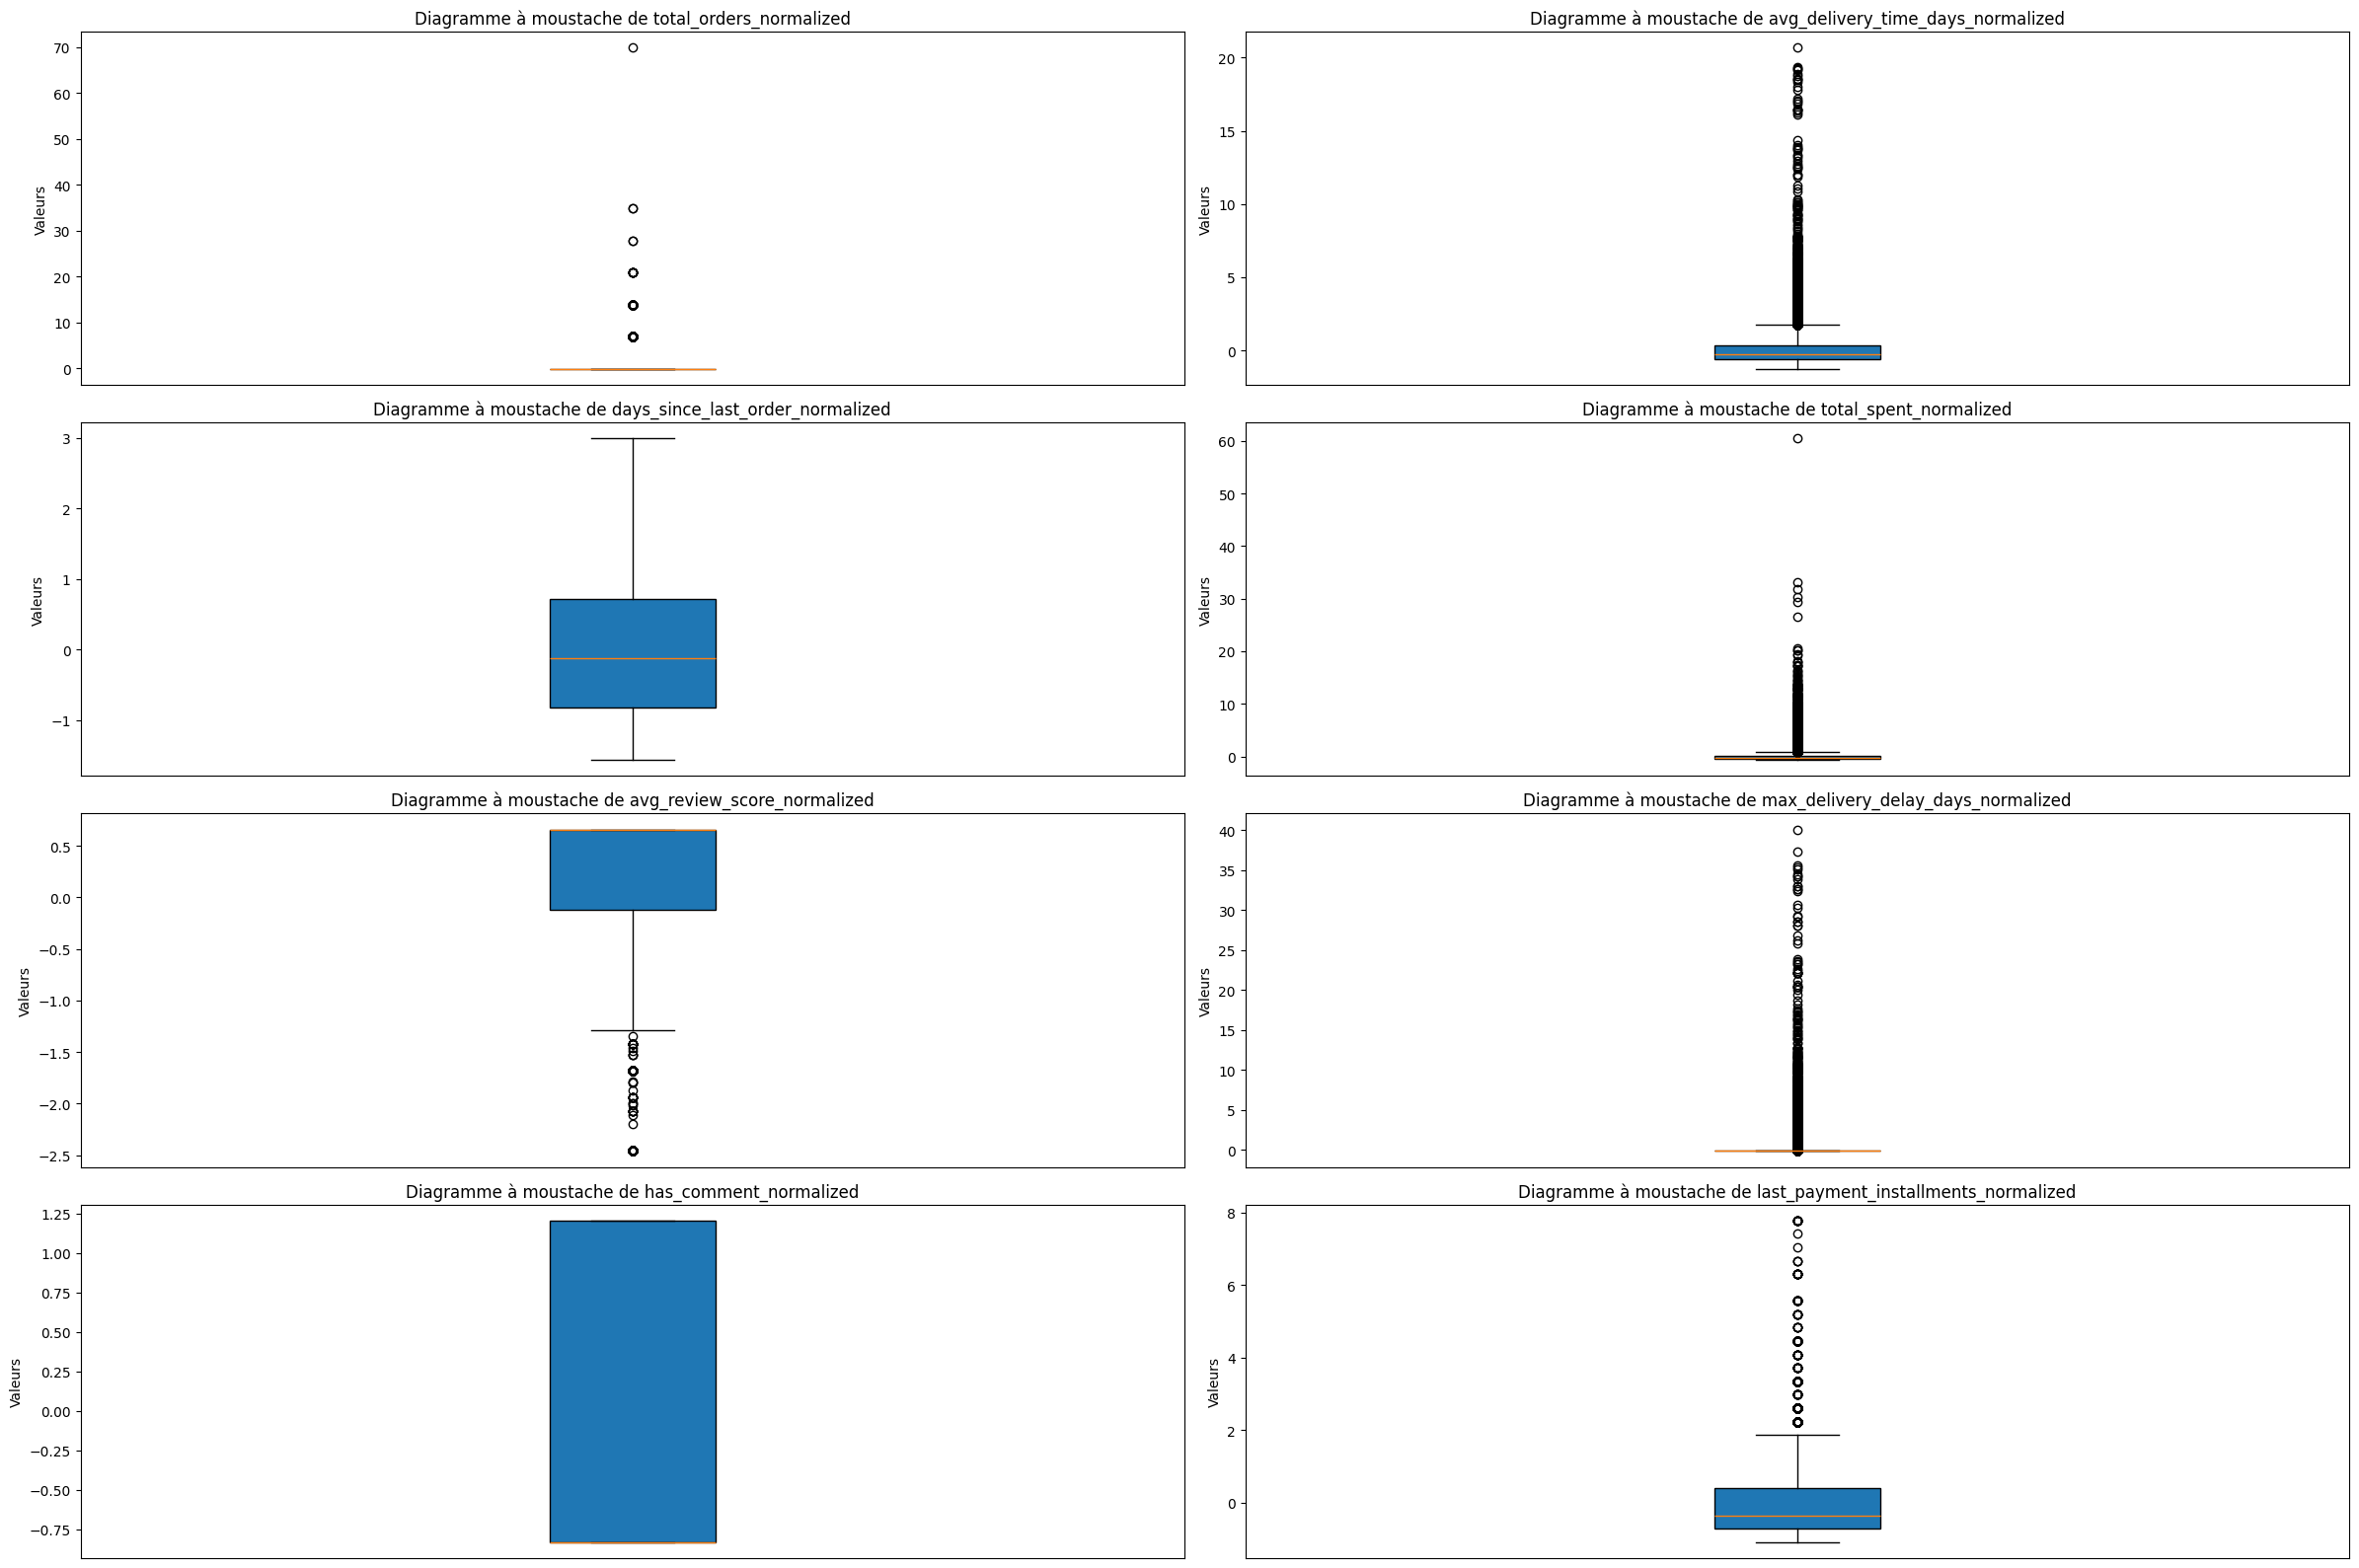

In [11]:
import matplotlib.pyplot as plt
import math

# Données pour le graphique
columns_to_plot = ['total_orders_normalized', 'avg_delivery_time_days_normalized', 'days_since_last_order_normalized', 'total_spent_normalized', 'avg_review_score_normalized', 'max_delivery_delay_days_normalized', 'has_comment_normalized', 'last_payment_installments_normalized']
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(len(columns_to_plot) / 2)

# Ajuster la taille de la figure
fig, axs = plt.subplots(num_rows, 2, figsize=(12*2, 4*num_rows))
axs = axs.ravel()

for idx, col in enumerate(columns_to_plot):
    axs[idx].boxplot(data_to_plot[idx], vert=True, patch_artist=True)
    axs[idx].set_title(f'Diagramme à moustache de {col}')
    axs[idx].set_ylabel('Valeurs')
    axs[idx].set_xticks([])

# Supprimer les axes non utilisés s'il y en a
for idx in range(len(columns_to_plot), num_rows*2):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

### Les données sont convenablement normalisées. Nous pouvons maintenant tester un clustering.

# Clustering KMeans

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94269 entries, 0 to 94268
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_unique_id                    94269 non-null  object 
 1   total_orders                          94269 non-null  int64  
 2   avg_delivery_time_days                94269 non-null  float64
 3   days_since_last_order                 94269 non-null  float64
 4   total_spent                           94269 non-null  float64
 5   avg_review_score                      94269 non-null  float64
 6   max_delivery_delay_days               94269 non-null  float64
 7   has_comment                           94269 non-null  int64  
 8   last_payment_type                     94269 non-null  object 
 9   last_payment_installments             94269 non-null  float64
 10  total_orders_normalized               94269 non-null  float64
 11  avg_delivery_ti

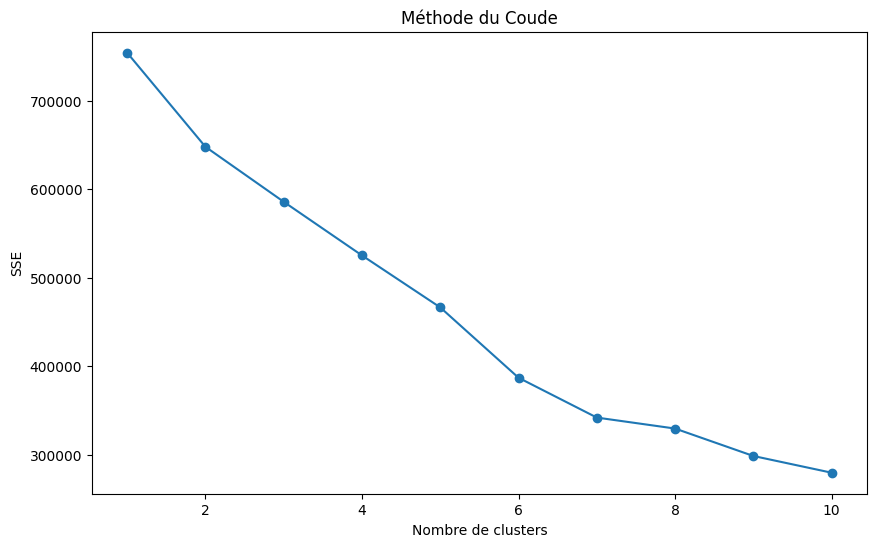

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supposons que 'df' est votre DataFrame

# Étape 1 : Sélection des colonnes pour le clustering
features = df[columns_to_plot]

# Étape 2 : Application de la méthode du coude pour trouver le nombre optimal de clusters
sse = [] # Liste pour stocker la somme des distances au carré
for k in range(1, 11): # Testez k de 1 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_) # Inertia: Somme des distances au carré

# Tracer la courbe SSE pour identifier le coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.show()




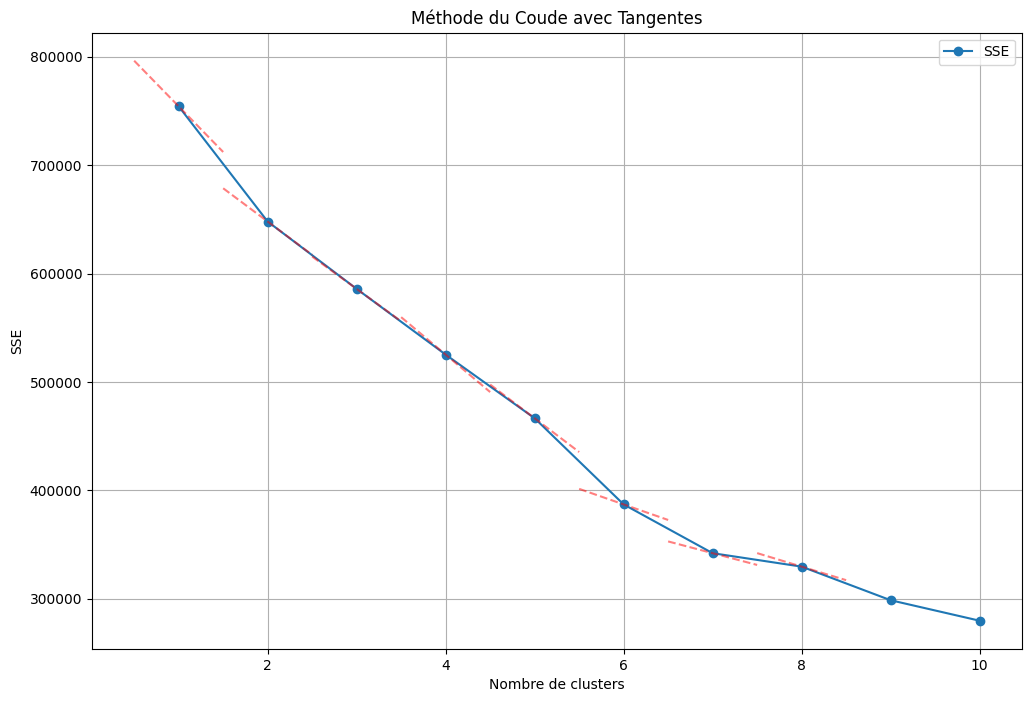

Nombre de clusters: 2, Score: 0.0000
Nombre de clusters: 3, Score: 0.0904
Nombre de clusters: 4, Score: 0.0728
Nombre de clusters: 5, Score: 0.0359
Nombre de clusters: 6, Score: 0.0435
Nombre de clusters: 7, Score: 0.0942
Nombre de clusters: 8, Score: 0.0928
Nombre de clusters: 9, Score: 0.0782


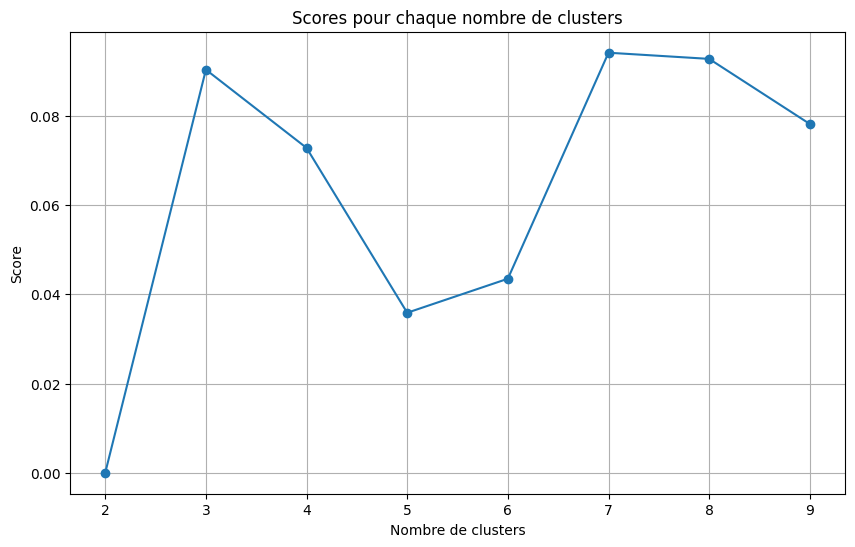

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Étape 2 : Application de la méthode du coude pour trouver le nombre optimal de clusters
sse = []  # Liste pour stocker la somme des distances au carré
k_range = range(1, 11)  # Testez k de 1 à 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)  # Inertia: Somme des distances au carré

# Étape 3 : Calcul des tangentes
def calculate_tangent(x1, y1, x2, y2):
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1
    return slope, intercept

tangents = []
for i in range(1, len(sse) - 1):
    slope, intercept = calculate_tangent(k_range[i-1], sse[i-1], k_range[i+1], sse[i+1])
    tangents.append((slope, intercept))

# Étape 4 : Tracer la courbe SSE et les tangentes
plt.figure(figsize=(12, 8))
plt.plot(k_range, sse, marker='o', label='SSE')
plt.title('Méthode du Coude avec Tangentes')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')

# Tracer les tangentes
for i, (slope, intercept) in enumerate(tangents, start=1):
    x = np.array([i-0.5, i+0.5])
    y = slope * x + intercept
    plt.plot(x, y, 'r--', alpha=0.5)

plt.legend()
plt.grid(True)
plt.show()

# Étape 5 : Calcul des angles entre les tangentes consécutives
angles = []
for i in range(len(tangents) - 1):
    angle = np.abs(np.arctan(tangents[i][0]) - np.arctan(tangents[i+1][0]))
    angles.append(np.degrees(angle))

import numpy as np

# Calcul des pentes des tangentes
slopes = [tangent[0] for tangent in tangents]

# Normalisation des pentes
normalized_slopes = np.abs(slopes) / max(np.abs(slopes))

# Calcul d'un score qui favorise les pentes proches de l'horizontale et les petits nombres de clusters
scores = [(1 - slope) * (1 / (i + 2)) for i, slope in enumerate(normalized_slopes)]

# Affichage des scores pour chaque nombre de clusters
for k, score in enumerate(scores, start=2):
    print(f"Nombre de clusters: {k}, Score: {score:.4f}")

# Visualisation des scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(scores) + 2), scores, marker='o')
plt.title('Scores pour chaque nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(True)
plt.show()

Selon cette analyse, nous pouvons suggérer que 4 est le bon nombre de clusters, pour éviter la sur-segmentation ou la sous-segmentation (même si 3 semble être un très bon candidat, avoir 4 clusters sera plus précis).

In [15]:
optimal_k = 6

In [16]:
# Étape 3 : Clustering K-Means avec le nombre de clusters choisi

nbClusters = optimal_k

kmeans_optimal = KMeans(n_clusters=nbClusters, random_state=42)
clusters = kmeans_optimal.fit_predict(features)

# Ajouter les labels de cluster au DataFrame
df['cluster_label'] = clusters

# Maintenant, 'df' contient une colonne supplémentaire 'cluster_label' indiquant le cluster attribué à chaque observation.

In [17]:
df.sample(10)

,customer_unique_id,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments,total_orders_normalized,avg_delivery_time_days_normalized,days_since_last_order_normalized,total_spent_normalized,avg_review_score_normalized,max_delivery_delay_days_normalized,has_comment_normalized,last_payment_installments_normalized,cluster_label
25288,44a17c0c284c144a94bfb44a60efd58c,1,9.966539,218.969005,92.45,5.0,0.768576,0,credit_card,1.0,-0.117306,-0.269755,-0.450268,-0.315781,0.658715,0.000632,-0.830379,-0.711981,3
7393,13eee0ba31aa2d2cd8a859abc4a3a330,1,10.115475,422.090891,242.89,3.0,0.000000,0,credit_card,8.0,-0.117306,-0.254016,0.879048,0.357879,-0.901249,-0.163056,-0.830379,1.872681,2
55541,96d632934b150c3792258765ff85ec21,1,9.947188,476.990127,174.04,2.0,0.000000,1,credit_card,10.0,-0.117306,-0.271800,1.238331,0.049573,-1.681231,-0.163056,1.204269,2.611156,2
34262,5cb955b555b3ea961bfce8cf00439d47,1,7.012766,61.048576,76.61,5.0,0.000000,0,credit_card,5.0,-0.117306,-0.581905,-1.483766,-0.386712,0.658715,-0.163056,-0.830379,0.764968,3
62673,a9fe18a214f15540c51b44edbb4268f0,1,10.937373,422.016238,217.72,1.0,0.000000,1,other,1.0,-0.117306,-0.167159,0.878559,0.245170,-2.461214,-0.163056,1.204269,-0.711981,1
17770,301a6d74a3eb7cd8e3508a045b8fa2e1,2,4.057413,420.089039,591.17,5.0,0.000000,1,credit_card,5.0,6.890479,-0.894222,0.865947,1.917455,0.658715,-0.163056,1.204269,0.764968,5
9142,18a65d67bb184e736656cc017f09f7b8,3,11.585642,186.816910,330.06,5.0,0.000000,0,other,1.0,13.898263,-0.098651,-0.660685,0.748221,0.658715,-0.163056,-0.830379,-0.711981,5
62260,a8d4b30682739775c40e7988379edcfc,1,5.957824,80.957454,256.77,4.0,0.000000,1,credit_card,10.0,-0.117306,-0.693390,-1.353473,0.420033,-0.121267,-0.163056,1.204269,2.611156,2
55691,9735b3d802abcb5401b48972ffb3f435,1,2.303437,442.287303,56.78,5.0,0.000000,1,credit_card,2.0,-0.117306,-1.079579,1.011221,-0.475509,0.658715,-0.163056,1.204269,-0.342744,0
78521,d4c026441bf6418d487ca880bac59ae2,1,6.008715,596.326586,115.81,1.0,0.000000,1,other,1.0,-0.117306,-0.688012,2.019319,-0.211177,-2.461214,-0.163056,1.204269,-0.711981,1


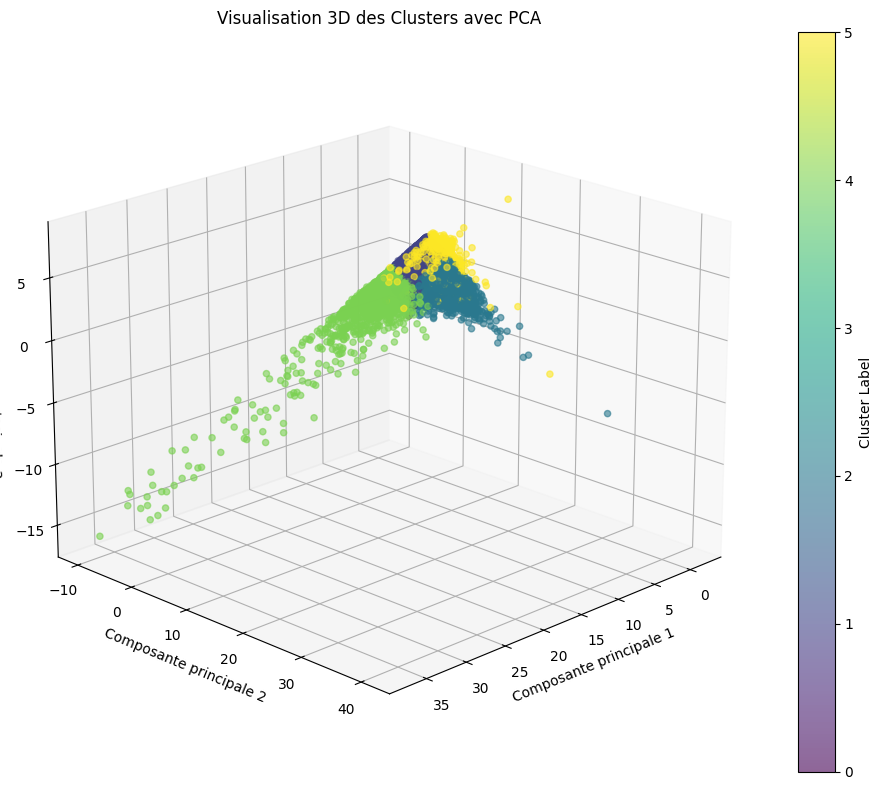

Variance expliquée par chaque composante principale:
PC1: 24.70%
PC2: 16.50%
PC3: 13.23%
Variance totale expliquée: 54.44%


In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supposons que 'clusters' est le résultat de votre clustering KMeans avec le DataFrame 'df' et 'features' vos colonnes normalisées

# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=3)  # Réduction à 3 dimensions
reduced_features = pca.fit_transform(features)

# Ajout des composantes principales au DataFrame
df['pca1'] = reduced_features[:, 0]
df['pca2'] = reduced_features[:, 1]
df['pca3'] = reduced_features[:, 2]

# Création d'une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Création du scatter plot 3D
scatter = ax.scatter(df['pca1'], df['pca2'], df['pca3'], c=df['cluster_label'], cmap='viridis', alpha=0.6)

# Ajout des labels et du titre
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')
ax.set_zlabel('Composante principale 3')
ax.set_title('Visualisation 3D des Clusters avec PCA')

# Ajout d'une barre de couleur
plt.colorbar(scatter, label='Cluster Label')

# Ajustement de la vue 3D
ax.view_init(elev=20, azim=45)

# Affichage du graphique
plt.tight_layout()
plt.show()

# Affichage de la variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.2%}")

print(f"Variance totale expliquée: {sum(explained_variance_ratio):.2%}")

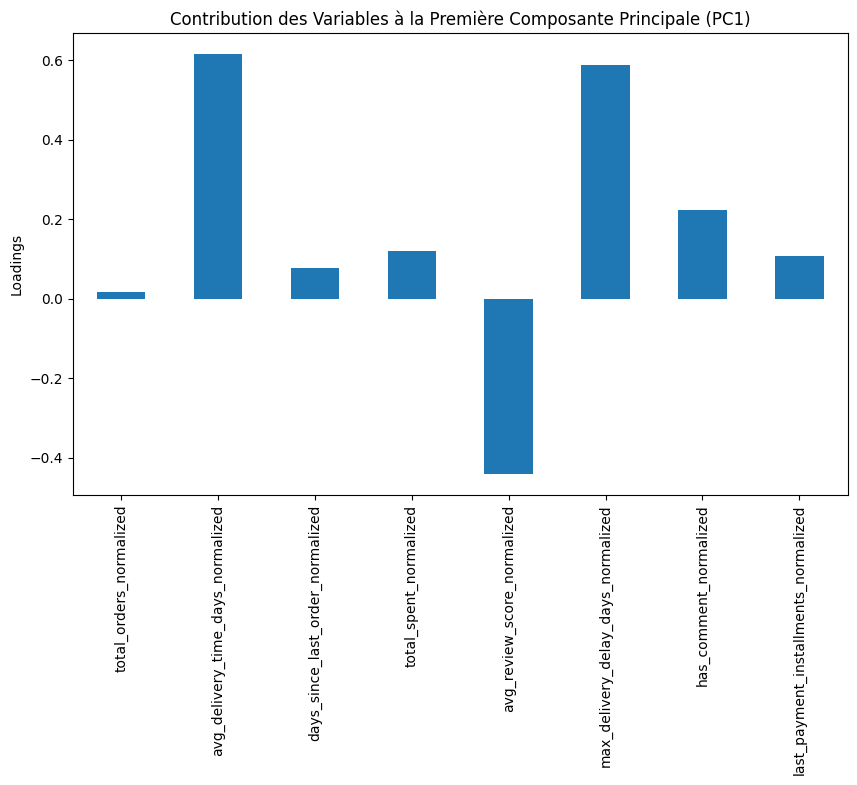

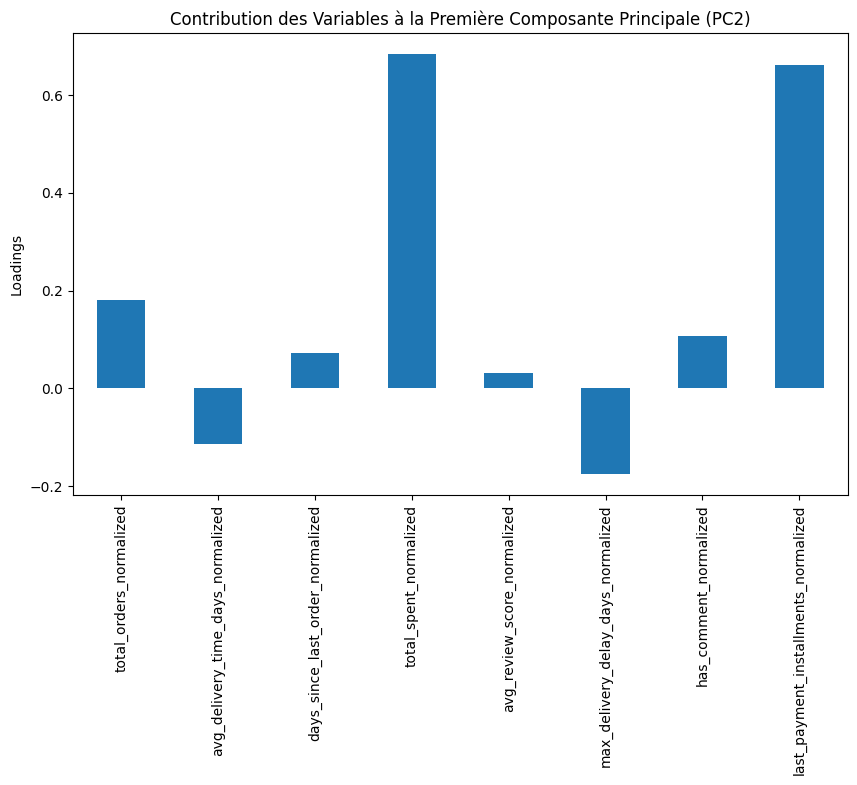

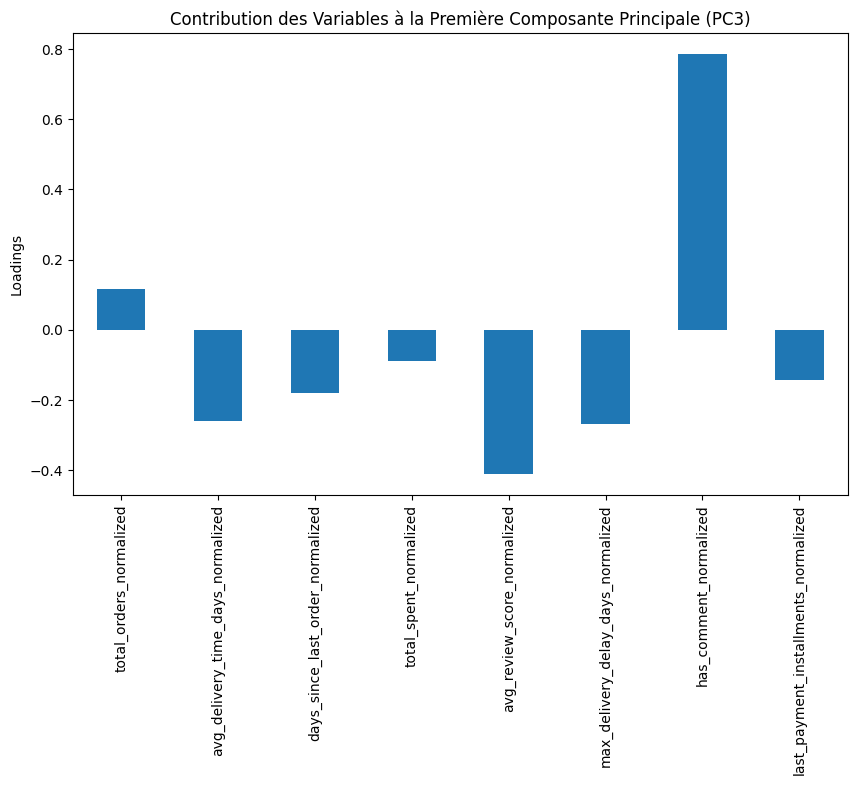

In [19]:
import matplotlib.pyplot as plt

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=features.columns)

# Graphique en barres pour les loadings de la première composante principale
loadings['PC1'].plot(kind='bar', figsize=(10, 6))
plt.title('Contribution des Variables à la Première Composante Principale (PC1)')
plt.ylabel('Loadings')
plt.show()

# Répétez pour PC2 
loadings['PC2'].plot(kind='bar', figsize=(10, 6))
plt.title('Contribution des Variables à la Première Composante Principale (PC2)')
plt.ylabel('Loadings')
plt.show()

# Répétez pour PC3
loadings['PC3'].plot(kind='bar', figsize=(10, 6))
plt.title('Contribution des Variables à la Première Composante Principale (PC3)')
plt.ylabel('Loadings')
plt.show()

In [20]:
import plotly.graph_objects as go

# Supposons que 'loadings' est votre DataFrame
# Conversion de 'loadings' en une matrice si ce n'est pas déjà le cas
# loadings_matrix = loadings.values si 'loadings' est un DataFrame

# Création de la heatmap
fig = go.Figure(data=go.Heatmap(
    z=loadings,  # Utiliser loadings_matrix si nécessaire
    x=loadings.columns,  # Les étiquettes des colonnes pour l'axe X
    y=loadings.index,  # Les étiquettes des lignes pour l'axe Y
    colorscale='Viridis',  # Palette de couleurs
    colorbar=dict(title='Scale'),  # Titre de la barre de couleur
))

# Générer des annotations pour chaque valeur dans la heatmap
annotations = []
for i, row in enumerate(loadings.index):
    for j, col in enumerate(loadings.columns):
        annotations.append(
            dict(
                x=col, y=row,
                text=str(loadings.loc[row, col].round(3)),  # Arrondi à 3 décimales
                xref='x1', yref='y1',
                font=dict(color="white" if loadings.loc[row, col] > loadings.values.mean() else "black", size=12),
                showarrow=False)
        )

# Ajouter les annotations au layout
fig.update_layout(
    annotations=annotations,
    title='Heatmap des Loadings PCA',
    xaxis=dict(title='Composantes'),
    yaxis=dict(title='Variables'),
    xaxis_tickangle=-45
)

fig.show()


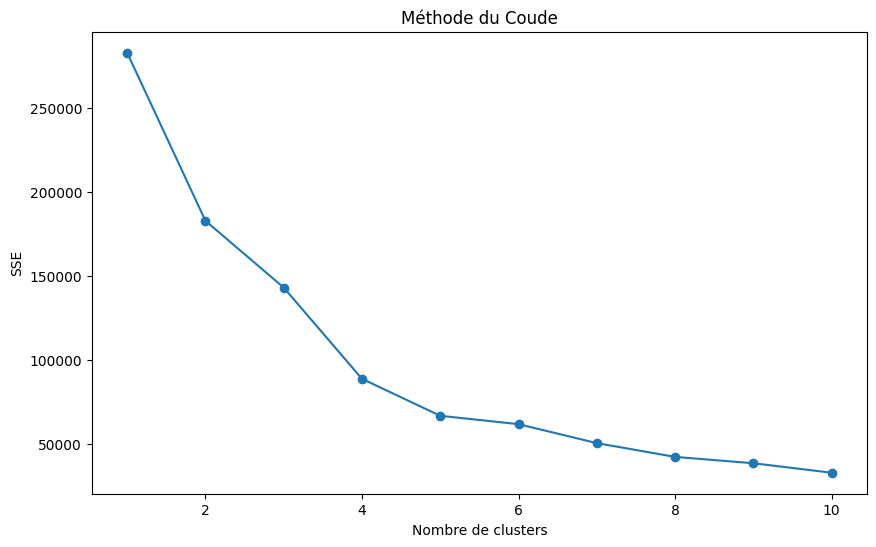

In [21]:
# Do a KMeans clustering with columns has_comment_normalized, avg_review_score_normalized, days_since_last_order_normalized 

# Étape 1 : Sélection des colonnes pour le clustering
features = df[['has_comment_normalized', 'avg_review_score_normalized', 'days_since_last_order_normalized']]
# Étape 2 : Application de la méthode du coude pour trouver le nombre optimal de clusters
sse = [] # Liste pour stocker la somme des distances au carré
for k in range(1, 11): # Testez k de 1 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_) # Inertia: Somme des distances au carré

# Tracer la courbe SSE pour identifier le coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.show()


In [22]:
# On choisit 6 clusters
nbClusters = 6

kmeans_optimal = KMeans(n_clusters=nbClusters, random_state=42)
clusters = kmeans_optimal.fit_predict(features)

# Ajouter les labels de cluster au DataFrame
df['cluster_label'] = clusters

# Maintenant, 'df' contient une colonne supplémentaire 'cluster_label' indiquant le cluster attribué à chaque observation.

df.sample(10)

,customer_unique_id,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments,...,days_since_last_order_normalized,total_spent_normalized,avg_review_score_normalized,max_delivery_delay_days_normalized,has_comment_normalized,last_payment_installments_normalized,cluster_label,pca1,pca2,pca3
59995,a2bb96a6e07ebb1d7768677ad8712910,1,13.797176,258.923900,51.38,2.0,0.000000,1,other,1.0,...,-0.188786,-0.499690,-1.681231,-0.163056,1.204269,-0.711981,3,0.842024,-0.756454,1.812448
85501,e7ca2e3d0057e4e4945f051f1c39166d,1,16.223600,245.167199,38.14,1.0,0.000000,1,credit_card,3.0,...,-0.278816,-0.558978,-2.461214,-0.163056,1.204269,0.026494,3,1.408614,-0.367932,1.981550
43466,75dbc0a73e8b75de8da60c17a2c78699,1,11.226863,450.141597,80.20,5.0,0.000000,1,credit_card,3.0,...,1.062623,-0.370636,0.658715,-0.163056,1.204269,0.026494,5,-0.163675,0.013330,0.580791
12959,2313a05d4b08ad58b737b4d9df881419,1,45.033137,232.027257,25.65,1.0,25.776921,1,credit_card,1.0,...,-0.364809,-0.614907,-2.461214,5.326793,1.204269,-0.711981,3,6.417101,-2.204257,-0.151517
74949,cb5945cac103ca5023f09f3d8a70c7ef,1,11.002384,414.919178,189.72,4.0,0.000000,1,credit_card,3.0,...,0.832113,0.119787,-0.121267,-0.163056,1.204269,0.026494,1,0.206097,0.311060,0.904243
40632,6e1190edde834ca84ba216d13627e85c,1,13.735139,586.039213,71.55,5.0,0.000000,0,other,1.0,...,1.951994,-0.409370,0.658715,-0.163056,-0.830379,-0.711981,0,-0.467715,-0.687017,-1.138714
85469,e7afbaf52adf6d3dc1ee0aec73fc63db,1,8.015208,335.907674,67.68,5.0,0.000000,1,credit_card,2.0,...,0.315028,-0.426700,0.658715,-0.163056,1.204269,-0.342744,1,-0.476961,-0.284807,0.861390
10641,1cafce36facffdac1067b9f27dc52703,1,29.180509,323.123530,80.21,1.0,7.828021,1,credit_card,1.0,...,0.231363,-0.370591,-2.461214,1.504120,1.204269,-0.711981,3,3.214283,-1.136980,1.176795
74929,cb47c30dd1cf3d5db1f6a2496b165712,1,8.775926,87.066551,183.80,4.0,0.000000,0,credit_card,6.0,...,-1.313493,0.093278,-0.121267,-0.163056,-0.830379,1.134206,2,-0.441190,0.678184,-0.404900
27217,49dd4334612dbadcdb8f6f68f41310e0,1,10.132859,135.049016,190.34,5.0,0.000000,0,credit_card,4.0,...,-0.999475,0.122564,0.658715,-0.163056,-0.830379,0.395731,2,-0.747873,0.239962,-0.715582


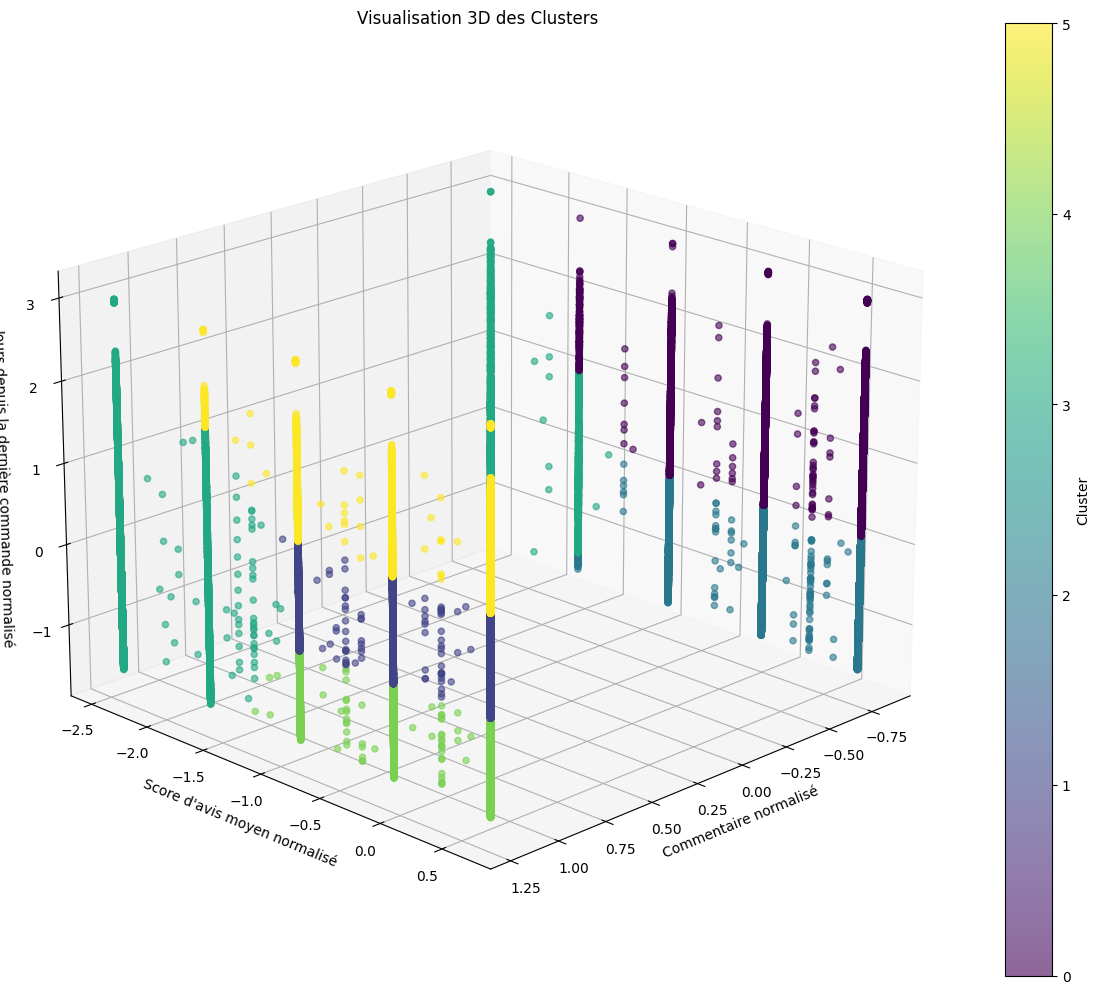

Statistiques des clusters:
               has_comment_normalized  avg_review_score_normalized  \
cluster_label                                                        
0                           -0.830379                     0.309473   
1                            1.204269                     0.282813   
2                           -0.830379                     0.347544   
3                            0.730033                    -2.286826   
4                            1.204269                     0.348589   
5                            1.204269                     0.300960   

               days_since_last_order_normalized  count  
cluster_label                                           
0                                      0.956199  22759  
1                                      0.166198  10829  
2                                     -0.752098  30306  
3                                     -0.043378  11717  
4                                     -0.983514  11356  
5            

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assurez-vous que df contient les colonnes nécessaires et que le clustering a été effectué

# Création d'une figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Création du scatter plot 3D
scatter = ax.scatter(
    df['has_comment_normalized'],
    df['avg_review_score_normalized'],
    df['days_since_last_order_normalized'],
    c=df['cluster_label'],
    cmap='viridis',
    alpha=0.6
)

# Ajout des labels et du titre
ax.set_xlabel('Commentaire normalisé')
ax.set_ylabel('Score d\'avis moyen normalisé')
ax.set_zlabel('Jours depuis la dernière commande normalisé')
ax.set_title('Visualisation 3D des Clusters')

# Ajout d'une barre de couleur
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Ajustement de la vue 3D
ax.view_init(elev=20, azim=45)

# Affichage du graphique
plt.tight_layout()
plt.show()

# Statistiques descriptives pour chaque cluster
cluster_stats = df.groupby('cluster_label').agg({
    'has_comment_normalized': 'mean',
    'avg_review_score_normalized': 'mean',
    'days_since_last_order_normalized': 'mean',
    'cluster_label': 'count'
}).rename(columns={'cluster_label': 'count'})

print("Statistiques des clusters:")
print(cluster_stats)

# Caractéristiques des centroides
centroids = kmeans_optimal.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['has_comment', 'avg_review_score', 'days_since_last_order'])
centroid_df.index.name = 'Cluster'

print("\nCaractéristiques des centroides:")
print(centroid_df)

Idées de segmentation (à 8 clusters)

- Cluster 0 : Clients ayant une note de review_score plutôt bonne  et ayant passé une commande il y a longtemps
- Cluster 1 : Clients ayant une note de review_score plutôt bonne et ayant passé une commande récemment
- Cluster 2 : Clients ayant une note de review_score élevée et ayant passé une commande récemment
- Cluster 3 : Clients ayant une note de review_score très mauvaise et ayant passé une commande récemment ou il y a longtemps

In [24]:
# give names to the clusters
cluster_names = {
    0: 'Clients satisfaits à relancer',
    1: 'Clients à fidéliser en priorité',
    2: 'Cluster 3',
    3: 'Cluster 4',
    4: 'Cluster 5',
    5: 'Cluster 6',
    6: 'Cluster 7',
    7: 'Cluster 8',
}

# DBSCAN

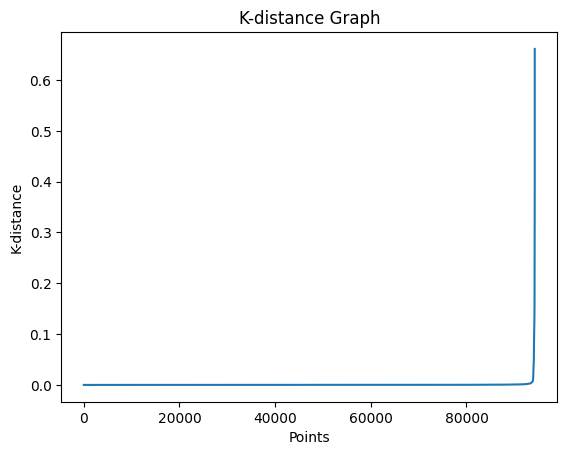

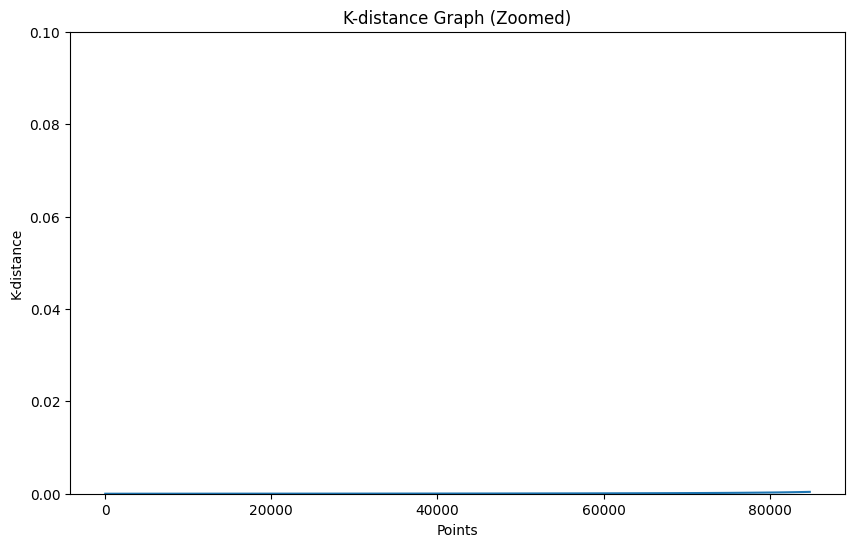

Quelques valeurs de k-distance à considérer:
1% percentile: 0.00000
5% percentile: 0.00000
10% percentile: 0.00001


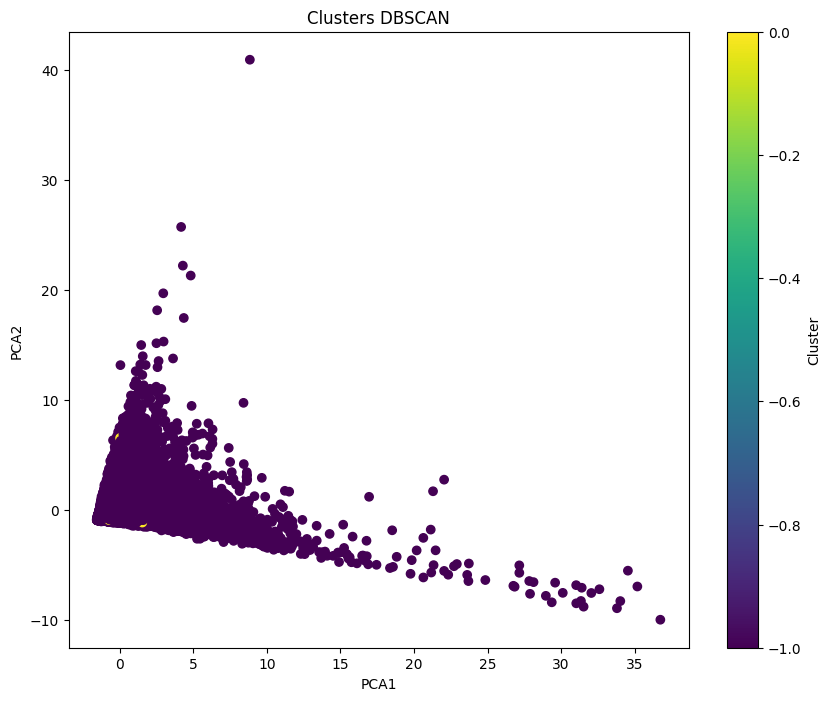

Nombre estimé de clusters: 1
Nombre estimé de points de bruit: 93920


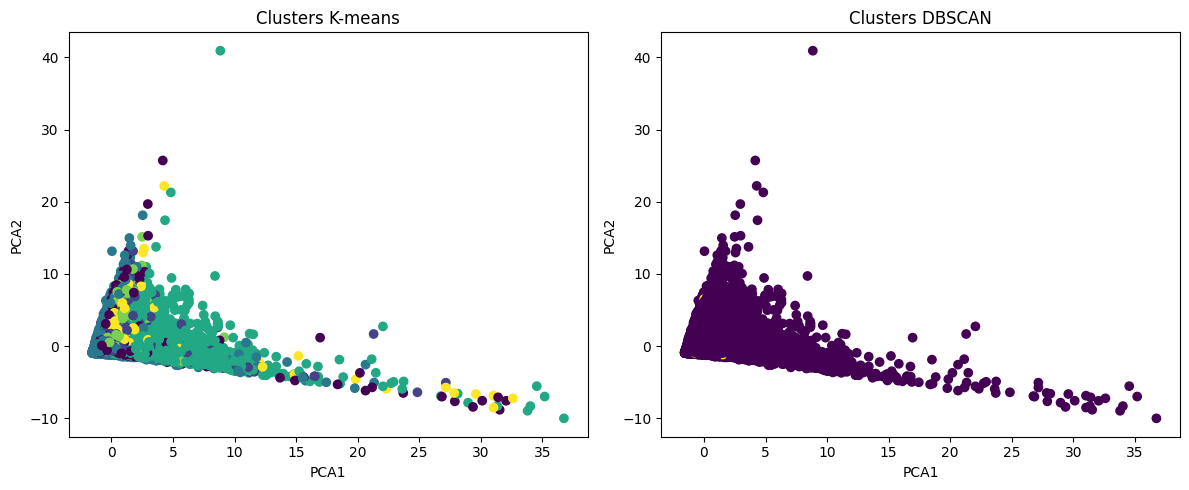

In [25]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Supposons que 'features' contient vos données normalisées

# Étape 1: Trouver le epsilon optimal
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points')
plt.ylabel('K-distance')
plt.show()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(distances[:int(len(distances)*0.9)])  # Plot only the first 90% of points
plt.title('K-distance Graph (Zoomed)')
plt.xlabel('Points')
plt.ylabel('K-distance')
plt.ylim(0, 0.1)  # Limit y-axis to 0.1
plt.show()

print("Quelques valeurs de k-distance à considérer:")
print(f"1% percentile: {np.percentile(distances, 1):.5f}")
print(f"5% percentile: {np.percentile(distances, 5):.5f}")
print(f"10% percentile: {np.percentile(distances, 10):.5f}")

# Choisissez le point d'inflexion comme epsilon
#epsilon = float(input("Basé sur le graphique, entrez la valeur d'epsilon choisie: "))
epsilon = 0.00070

# Étape 2: Appliquer DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=100)
dbscan_clusters = dbscan.fit_predict(features)

# Ajouter les labels DBSCAN au DataFrame
df['dbscan_cluster'] = dbscan_clusters

# Étape 3: Visualiser les résultats
plt.figure(figsize=(10, 8))
plt.scatter(df['pca1'], df['pca2'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('Clusters DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

# Étape 4: Analyser les résultats
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise = list(dbscan_clusters).count(-1)

print(f'Nombre estimé de clusters: {n_clusters}')
print(f'Nombre estimé de points de bruit: {n_noise}')

# Comparaison avec K-means
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(df['pca1'], df['pca2'], c=df['cluster_label'], cmap='viridis')
plt.title('Clusters K-means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(122)
plt.scatter(df['pca1'], df['pca2'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('Clusters DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()

In [26]:
# Tu as déjà les colonnes suivantes, donc cette étape est probablement déjà faite.
df['Recency'] = df['days_since_last_order']
df['Frequency'] = df['total_orders']
df['Monetary'] = df['total_spent']


In [27]:
exit(0)

In [28]:
# Calcul des percentiles pour 'Recency' (où un score bas est bon)
percentiles_r = df['Recency'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Calcul des percentiles pour 'Frequency' et 'Monetary' (où un score élevé est bon)
percentiles_f = df['Frequency'].quantile([0.2, 0.4, 0.6, 0.8]).values
percentiles_m = df['Monetary'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Fonction pour attribuer les scores basés sur les percentiles
def assign_score(value, percentiles, high_is_good=True):
    if high_is_good:
        if value <= percentiles[0]:
            return 1
        elif value <= percentiles[1]:
            return 2
        elif value <= percentiles[2]:
            return 3
        elif value <= percentiles[3]:
            return 4
        else:
            return 5
    else:
        if value <= percentiles[0]:
            return 5
        elif value <= percentiles[1]:
            return 4
        elif value <= percentiles[2]:
            return 3
        elif value <= percentiles[3]:
            return 2
        else:
            return 1



In [29]:
df.sample(10)

,customer_unique_id,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments,...,has_comment_normalized,last_payment_installments_normalized,cluster_label,pca1,pca2,pca3,dbscan_cluster,Recency,Frequency,Monetary
47761,8171070e394e383aa9e30a6caf827294,1,6.279039,440.294977,102.03,3.0,0.0,0,other,1.0,...,-0.830379,-0.711981,0,-0.323498,-0.620950,-0.134536,-1,440.294977,1,102.03
10416,1c0d4c0b6bdabef40a2764e8d19ddaba,1,4.032708,255.980787,277.64,2.0,0.0,1,credit_card,8.0,...,1.204269,1.872681,3,0.604572,1.762536,1.623110,-1,255.980787,1,277.64
51088,8ad1788843e107a8387db336270c2131,1,12.885498,286.016100,123.89,4.0,0.0,0,credit_card,8.0,...,-0.830379,1.872681,2,-0.025736,1.027933,-0.833502,-1,286.016100,1,123.89
22693,3d8ee81a826ef3a7a0b47f41fb259de7,1,4.131400,492.347234,44.24,5.0,0.0,1,other,1.0,...,1.204269,-0.711981,5,-0.702614,-0.480472,0.846434,-1,492.347234,1,44.24
41078,6f5b1cccc38bb6297590196aca87e49f,1,18.596736,172.948715,32.78,4.0,0.0,0,other,1.0,...,-0.830379,-0.711981,2,-0.038238,-1.083158,-0.450746,-1,172.948715,1,32.78
91572,f889db6fc6944e1855d143f79c4c8844,1,14.642083,623.832697,81.78,5.0,0.0,0,credit_card,8.0,...,-0.830379,1.872681,0,-0.106216,1.061362,-1.582252,-1,623.832697,1,81.78
21270,39a67a9d203abf027ebac4a1ffeeb663,1,17.311493,327.188646,66.67,5.0,0.0,0,credit_card,6.0,...,-0.830379,1.134206,0,-0.170431,0.354338,-1.194839,0,327.188646,1,66.67
26636,4837d18df7cb3d4baf1a3959d0244554,2,12.014624,70.152593,140.93,3.0,0.0,1,other,1.0,...,1.204269,-0.711981,4,0.456870,0.745395,2.537255,-1,70.152593,2,140.93
37127,6498df2c9689817da899bc7471154397,1,11.414919,270.207581,205.87,5.0,0.0,0,credit_card,10.0,...,-0.830379,2.611156,2,-0.349450,1.801794,-1.233258,-1,270.207581,1,205.87
73690,c7fb005dfaed077788b1da6313ee6688,1,6.880521,74.872963,43.29,4.0,0.0,0,credit_card,1.0,...,-0.830379,-0.711981,2,-0.844597,-0.956880,-0.017485,-1,74.872963,1,43.29


In [ ]:
# Ajoutez ces imports au début du notebook si ce n'est pas déjà fait
import joblib
from datetime import timedelta

# Après votre meilleur modèle KMeans (supposons que c'est kmeans_optimal)
# Sauvegarde du meilleur modèle
joblib.dump(kmeans_optimal, 'kmeans_optimal.joblib')

# Création d'un DataFrame avec les données dégradées (décalées d'un an)
df_degraded = df.copy()

# Vérifiez si 'days_since_last_order' existe, sinon utilisez une autre colonne pertinente
if 'days_since_last_order' in df_degraded.columns:
    df_degraded['days_since_last_order'] += 365
else:
    print("Attention : La colonne 'days_since_last_order' n'existe pas. Veuillez vérifier vos colonnes.")

# Recalcul des features normalisées pour les données dégradées
features_to_normalize = columns_to_plot

# Ajoutez 'days_since_last_order' à la liste si elle existe
if 'days_since_last_order' in df_degraded.columns:
    features_to_normalize.append('days_since_last_order')

for feature in features_to_normalize:
    if feature in df_degraded.columns:
        df_degraded[f'{feature}_normalized'] = (df_degraded[feature] - df_degraded[feature].min()) / (df_degraded[feature].max() - df_degraded[feature].min())
    else:
        print(f"Attention : La colonne '{feature}' n'existe pas. Elle ne sera pas normalisée.")

# Sélection des features normalisées pour le clustering dégradé
features_degraded = [f'{feature}_normalized' for feature in features_to_normalize if f'{feature}_normalized' in df_degraded.columns]
X_degraded = df_degraded[features_degraded]

# Création et entraînement du modèle KMeans dégradé
kmeans_degraded = KMeans(n_clusters=6, random_state=42)
kmeans_degraded.fit(X_degraded)

# Sauvegarde du modèle dégradé
joblib.dump(kmeans_degraded, 'kmeans_degraded.joblib')

print("Les modèles optimal et dégradé ont été sauvegardés.")
print("Features utilisées pour le modèle dégradé :", features_degraded)

Les modèles optimal et dégradé ont été sauvegardés.
Features utilisées pour le modèle dégradé : ['total_orders_normalized_normalized', 'avg_delivery_time_days_normalized_normalized', 'days_since_last_order_normalized_normalized', 'total_spent_normalized_normalized', 'avg_review_score_normalized_normalized', 'max_delivery_delay_days_normalized_normalized', 'has_comment_normalized_normalized', 'last_payment_installments_normalized_normalized', 'days_since_last_order_normalized']


: 